#  Linear regression

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss

In [ ]:
from google.colab import files
uploaded = files.upload()
!ls

Saving ex1data1.txt to ex1data1.txt
ex1data1.txt  sample_data


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load datad
data = np.loadtxt('ex1data1.txt', delimiter=',')  # Load the text file with a comma as a delimiter
print(data[0:5,:])
#load the data a create a np vectors X and y


[[ 6.1101 17.592 ]
 [ 5.5277  9.1302]
 [ 8.5186 13.662 ]
 [ 7.0032 11.854 ]
 [ 5.8598  6.8233]]


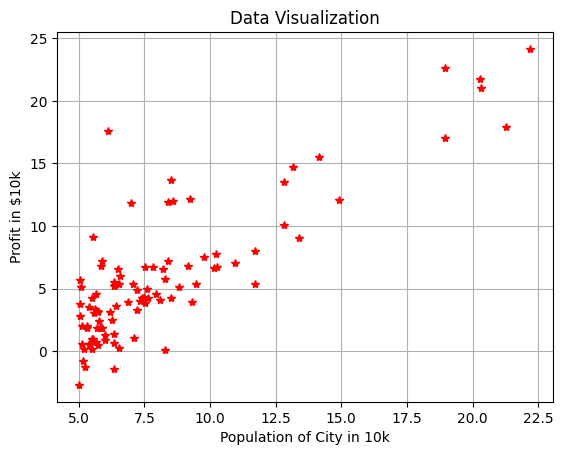

In [2]:
# ==================== Part 1: Plotting ====================
# Plot data
X = data[:, 0]  # First column
y = data[:, 1]  # Second column
plt.plot(X, y, '*r', label='Profit')  # Red stars for positive examples
plt.grid(True)  # Turn on the grid
#plt.legend()    # Add legend
plt.xlabel('Population of City in 10k')  # Label for x-axis
plt.ylabel('Profit in $10k')  # Label for y-axis
plt.title('Data Visualization')  # Add a title
plt.show()

# Cost Function

The objective of linear regression is to minimize the cost function:
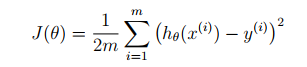

where the hypothesis h is given by

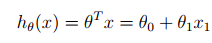

**Create a matrix by adding a column of ones to the vecto X**

You should expect to see a cost of approximately 32.07


In [19]:
# using numpy and scipy
# Sigmoid function
from scipy.optimize import minimize


#Implement cost function
def cost_function(theta, X, y):
    m = len(y)
    # Instructions: Compute the cost of a particular choice of theta
    #               You should set J to the cost.
    h = X @ theta  # Hypothesis function
   # J = (1/2*m) * np.sum(np.sum(h - y)**2)
    J = np.sum((h - y)**2) / (2 * m)# Cost function
    
    return J

m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]  # Then, create a matrix by adding a column of ones to the vecto X

X = np.hstack([np.ones((m, 1)), X])  # (m x 2)

theta = np.zeros((2, 1)) # Look that theta is a vector 2x1
print(f"Model parameters: {theta}")
print(f"Cost function: {cost_function(theta, X, y)}") #You should expect to see a cost of approximately 32.07


Model parameters: [[0.]
 [0.]]
Cost function: 32.072733877455676


# Gradient descent

Next, you will implement gradient descent in the function gradientDescent.
The loop structure has been written for you, and you only need to supply
the updates to θ within each iteration.

Using the following values:
iterations = 3
theta = np.zeros((2, 1))
alpha = 0.01

The first three iteration:

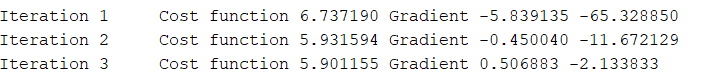



Theta found by gradient descent:  [-1.15434791  0.91762697]
For population = 35,000, we predict a profit of 20573.46
For population = 35,000, we predict a profit of 52690.41


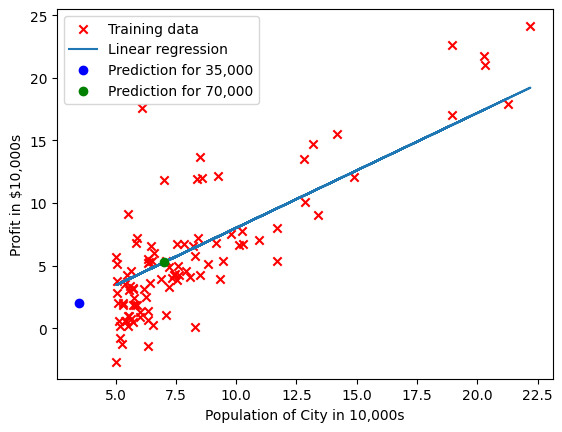

In [23]:
import numpy as np
import matplotlib.pyplot as plt

m = data.shape[0]
y = data[:, [1]]
X = data[:, [0]]
X = np.hstack([np.ones((m, 1)), X])
iterations = 20000
theta = np.zeros((2, 1))
alpha = 0.01
def gradientDescent(X, y, theta, alpha, iterations):
  m = len(y)  # number of training examples
  J_history = np.zeros(iterations)

  for iter in range(iterations):
  #Instructions: Perform a single gradient step on the parameter vector
  #               theta.
  #
  # Hint: While debugging, it can be useful to print out the values
  #       of the cost function (computeCostMulti) and gradient here.
      # Save the cost J in every iteration

      h = X @ theta
      diff_J = h - y
      theta = theta - (alpha/m) * ((X.T @ diff_J) /m)

      J_history[iter] = cost_function(theta,X, y)
      #print(f"Iteration {iter + 1}\tCost: {J_history[iter]:.6f}")
  return theta, J_history

theta, J_history = gradientDescent(X, y, theta, alpha, iterations);
print("Theta found by gradient descent: ", theta.ravel())

# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict1 * 10000).item():.2f}')

predict2 = np.array([1, 7.0]) @ theta
print(f'For population = 35,000, we predict a profit of {(predict2 * 10000).item():.2f}')


# Plot the linear fit
plt.scatter(X[:, 1], y, color='red', marker='x', label='Training data')  # X[:,1] is the feature (since X[:,0] is the bias term)
plt.plot(X[:, 1], X @ theta, label='Linear regression')  # X @ theta gives the predicted values
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(3.5, predict1.item(), 'ob', label='Prediction for 35,000')
plt.plot(7.0, predict2.item(), 'og', label='Prediction for 70,000')
plt.legend()
plt.show()

# Visualization

Visualizing J(theta_0, theta_1) ...


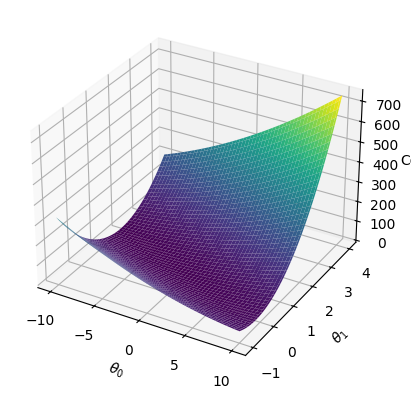

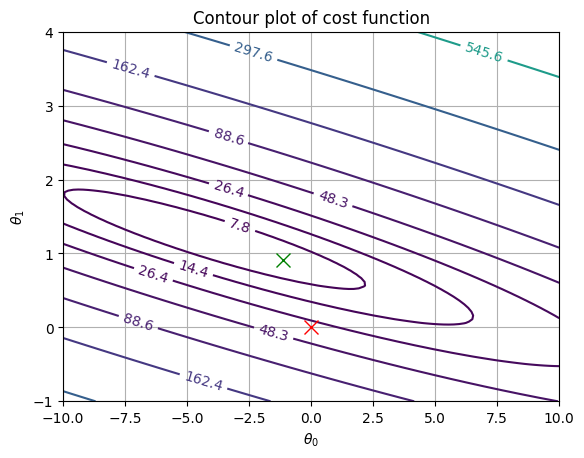

In [24]:

from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots

print('Visualizing J(theta_0, theta_1) ...')

theta_init = np.zeros((2, 1))
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out J_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
        J_vals[i, j] = cost_function(t, X, y)

# Transpose J_vals to match the orientation of MATLAB's surf
J_vals = J_vals.T

# Surface plot
theta0_vals_mesh, theta1_vals_mesh = np.meshgrid(theta0_vals, theta1_vals)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals_mesh, theta1_vals_mesh, J_vals, cmap='viridis')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Cost')

# Contour plot
plt.figure()
cp = plt.contour(theta0_vals, theta1_vals, J_vals, levels=np.logspace(-2, 3, 20))
plt.clabel(cp)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# Plot the final theta found by gradient descent
plt.plot(theta_init[0, 0], theta_init[1, 0], 'rx', markersize=10, linewidth=2)
plt.plot(theta[0, 0], theta[1, 0], 'gx', markersize=10, linewidth=2)
plt.title('Contour plot of cost function')
plt.grid(True)
plt.show()


# Salary Dataset in CSV for Simple linear regression

Next, you will implement a linear regression model using both gradient descent and the normal equation

Use the following steps:

1. Visualize the dataset

*   Load the CSV file into a DataFrame.
*   Plot the salary data (scatter plot of years of experience vs. salary) to observe the relationship.

2. Implement gradient descent

*   Initialize parameters (theta0, theta1).

*   Define a learning rate (α).

*   Use your cost_function to evaluate error and apply gradientDescent to iteratively update parameters until convergence.

3. Plot the fitted model (gradient descent)

* Overlay the regression line obtained via gradient descent on top of the scatter plot.

* Compare visually how well the model fits the data.
* Estimate the salary for a new employee that has 2.5 year experience



In [1]:
from google.colab import files
uploaded = files.upload()
!ls

Saving Salary_dataset.csv to Salary_dataset.csv
Salary_dataset.csv  sample_data


In [ ]:
import numpy as np
data = np.loadtxt('Salary_dataset.txt', delimiter='\t')
print(data)

[[1.20000e+00 3.93440e+04]
 [1.40000e+00 4.62060e+04]
 [1.60000e+00 3.77320e+04]
 [2.10000e+00 4.35260e+04]
 [2.30000e+00 3.98920e+04]
 [3.00000e+00 5.66430e+04]
 [3.10000e+00 6.01510e+04]
 [3.30000e+00 5.44460e+04]
 [3.30000e+00 6.44460e+04]
 [3.80000e+00 5.71900e+04]
 [4.00000e+00 6.32190e+04]
 [4.10000e+00 5.57950e+04]
 [4.10000e+00 5.69580e+04]
 [4.20000e+00 5.70820e+04]
 [4.60000e+00 6.11120e+04]
 [5.00000e+00 6.79390e+04]
 [5.20000e+00 6.60300e+04]
 [5.40000e+00 8.30890e+04]
 [6.00000e+00 8.13640e+04]
 [6.10000e+00 9.39410e+04]
 [6.90000e+00 9.17390e+04]
 [7.20000e+00 9.82740e+04]
 [8.00000e+00 1.01303e+05]
 [8.30000e+00 1.13813e+05]
 [8.80000e+00 1.09432e+05]
 [9.10000e+00 1.05583e+05]
 [9.60000e+00 1.16970e+05]
 [9.70000e+00 1.12636e+05]
 [1.04000e+01 1.22392e+05]
 [1.06000e+01 1.21873e+05]]
